In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train_path='/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/train'
test_path='/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/test'
validation_path='/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/validation'

In [ ]:
img_width=180
img_height=180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(train_path,
                                                       shuffle=True,
                                                       image_size=(img_width,img_height),
                                                       batch_size=32,
                                                       validation_split=False)

Found 3195 files belonging to 36 classes.


In [ ]:
data_cat=data_train.class_names

In [ ]:
data_val=tf.keras.utils.image_dataset_from_directory(
    validation_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [ ]:
data_val.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle=True,
    batch_size=32,
    image_size=(img_width,img_height),
    validation_split=False

)

Found 295 files belonging to 36 classes.


In [ ]:
data_test.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

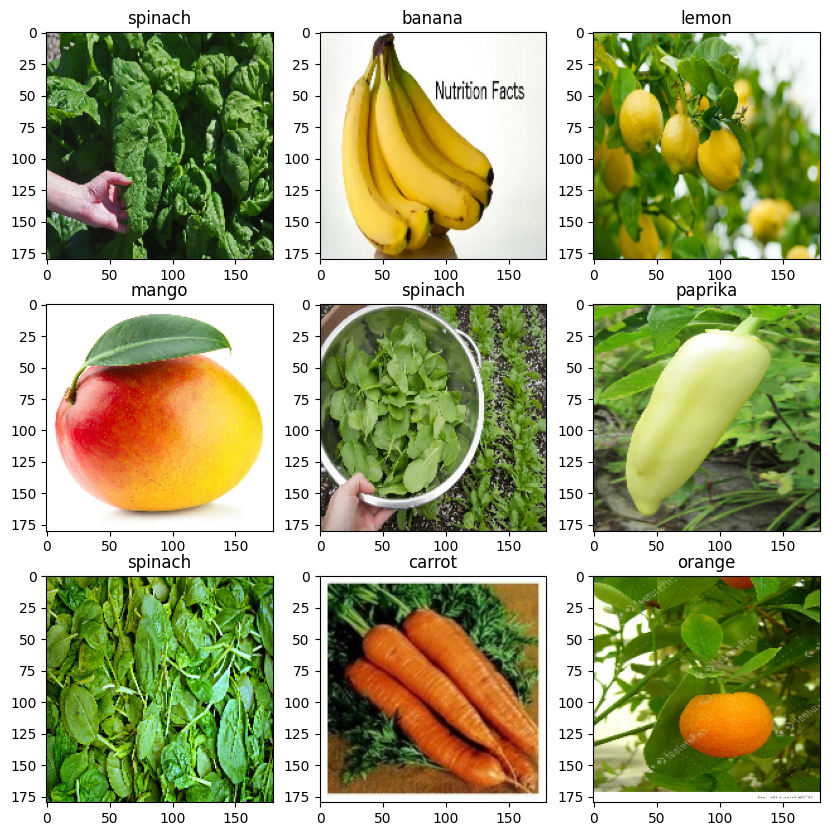

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
100/100 [==============================] - 558s 6s/step - loss: 3.4549 - accuracy: 0.0707 - val_loss: 2.8137 - val_accuracy: 0.2279
Epoch 2/25
100/100 [==============================] - 185s 2s/step - loss: 2.6629 - accuracy: 0.2485 - val_loss: 1.9107 - val_accuracy: 0.4758
Epoch 3/25
100/100 [==============================] - 181s 2s/step - loss: 2.0603 - accuracy: 0.4200 - val_loss: 1.2525 - val_accuracy: 0.6752
Epoch 4/25
100/100 [==============================] - 189s 2s/step - loss: 1.4392 - accuracy: 0.6028 - val_loss: 0.6977 - val_accuracy: 0.8319
Epoch 5/25
100/100 [==============================] - 190s 2s/step - loss: 0.9043 - accuracy: 0.7521 - val_loss: 0.4513 - val_accuracy: 0.9145
Epoch 6/25
100/100 [==============================] - 175s 2s/step - loss: 0.5384 - accuracy: 0.8454 - val_loss: 0.3578 - val_accuracy: 0.9174
Epoch 7/25
100/100 [==============================] - 189s 2s/step - loss: 0.3535 - accuracy: 0.9058 - val_loss: 0.3742 - val_accuracy: 0.9345

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Text(0.5, 1.0, 'Loss')

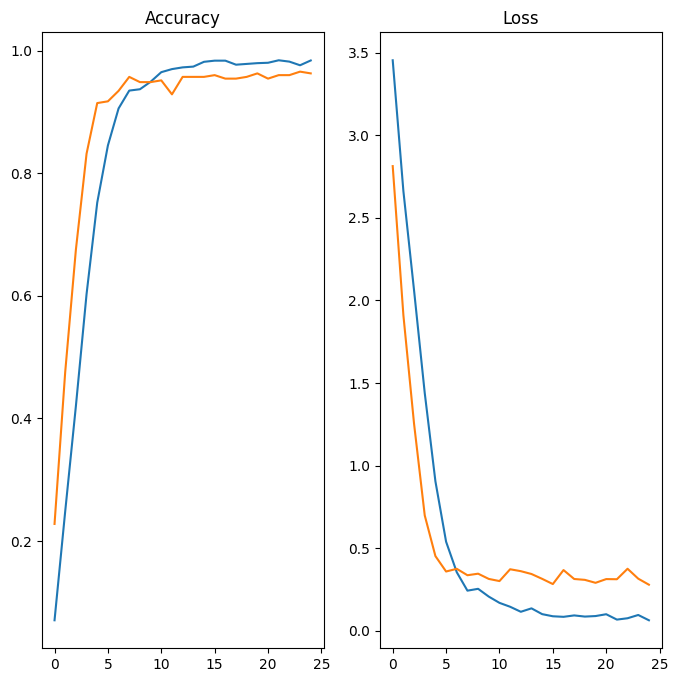

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = '/content/sample_data/corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 196ms/step


In [21]:
score = tf.nn.softmax(predict)

In [23]:
print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Fruit in image is corn with accuracy of 65.88
